In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
os.environ["QT_QPA_PLATFORM"] = "wayland"


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /home/matthieu/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-2-28 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'
me = 'data/pictures/2024-02-28-214106.jpg'

image 1/1: 720x1280 2 persons, 2 ties
Speed: 970.0ms pre-process, 64.3ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


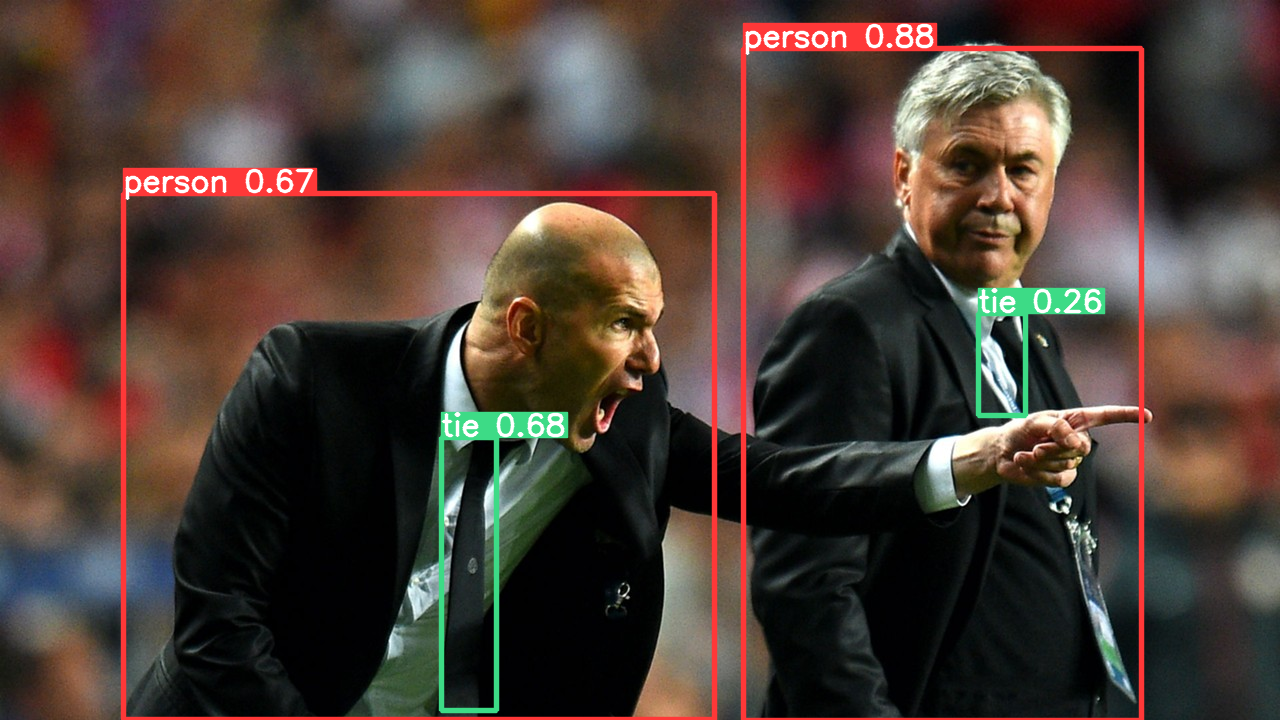

In [5]:
results = model(img)
results.print()
results.show()

image 1/1: 720x1280 3 persons, 1 tie
Speed: 34.7ms pre-process, 84.5ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


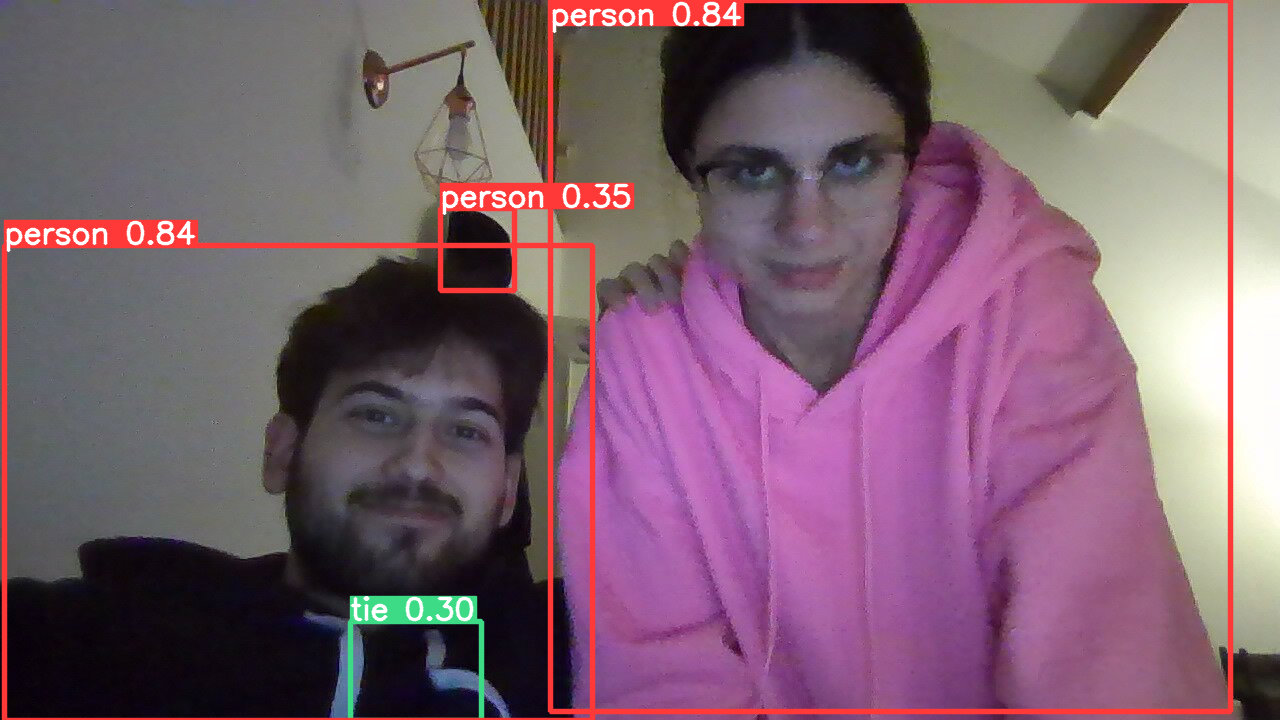

In [6]:
results = model(me)
results.print()
results.show()

In [7]:
results.xyxy[0]


tensor([[4.42172e+00, 2.45221e+02, 5.92532e+02, 7.20000e+02, 8.44992e-01, 0.00000e+00],
        [5.50303e+02, 0.00000e+00, 1.23028e+03, 7.11639e+02, 8.44788e-01, 0.00000e+00],
        [4.40547e+02, 2.08258e+02, 5.14755e+02, 2.90064e+02, 3.46685e-01, 0.00000e+00],
        [3.50542e+02, 6.21873e+02, 4.81177e+02, 7.20000e+02, 2.97436e-01, 2.70000e+01]])

In [10]:
print(np.array(results.render()).shape)
print(np.squeeze(results.render()).shape)

(1, 720, 1280, 3)
(720, 1280, 3)


image 1/1: 1068x1600 27 cars, 1 truck
Speed: 10.8ms pre-process, 99.4ms inference, 0.7ms NMS per image at shape (1, 3, 448, 640)


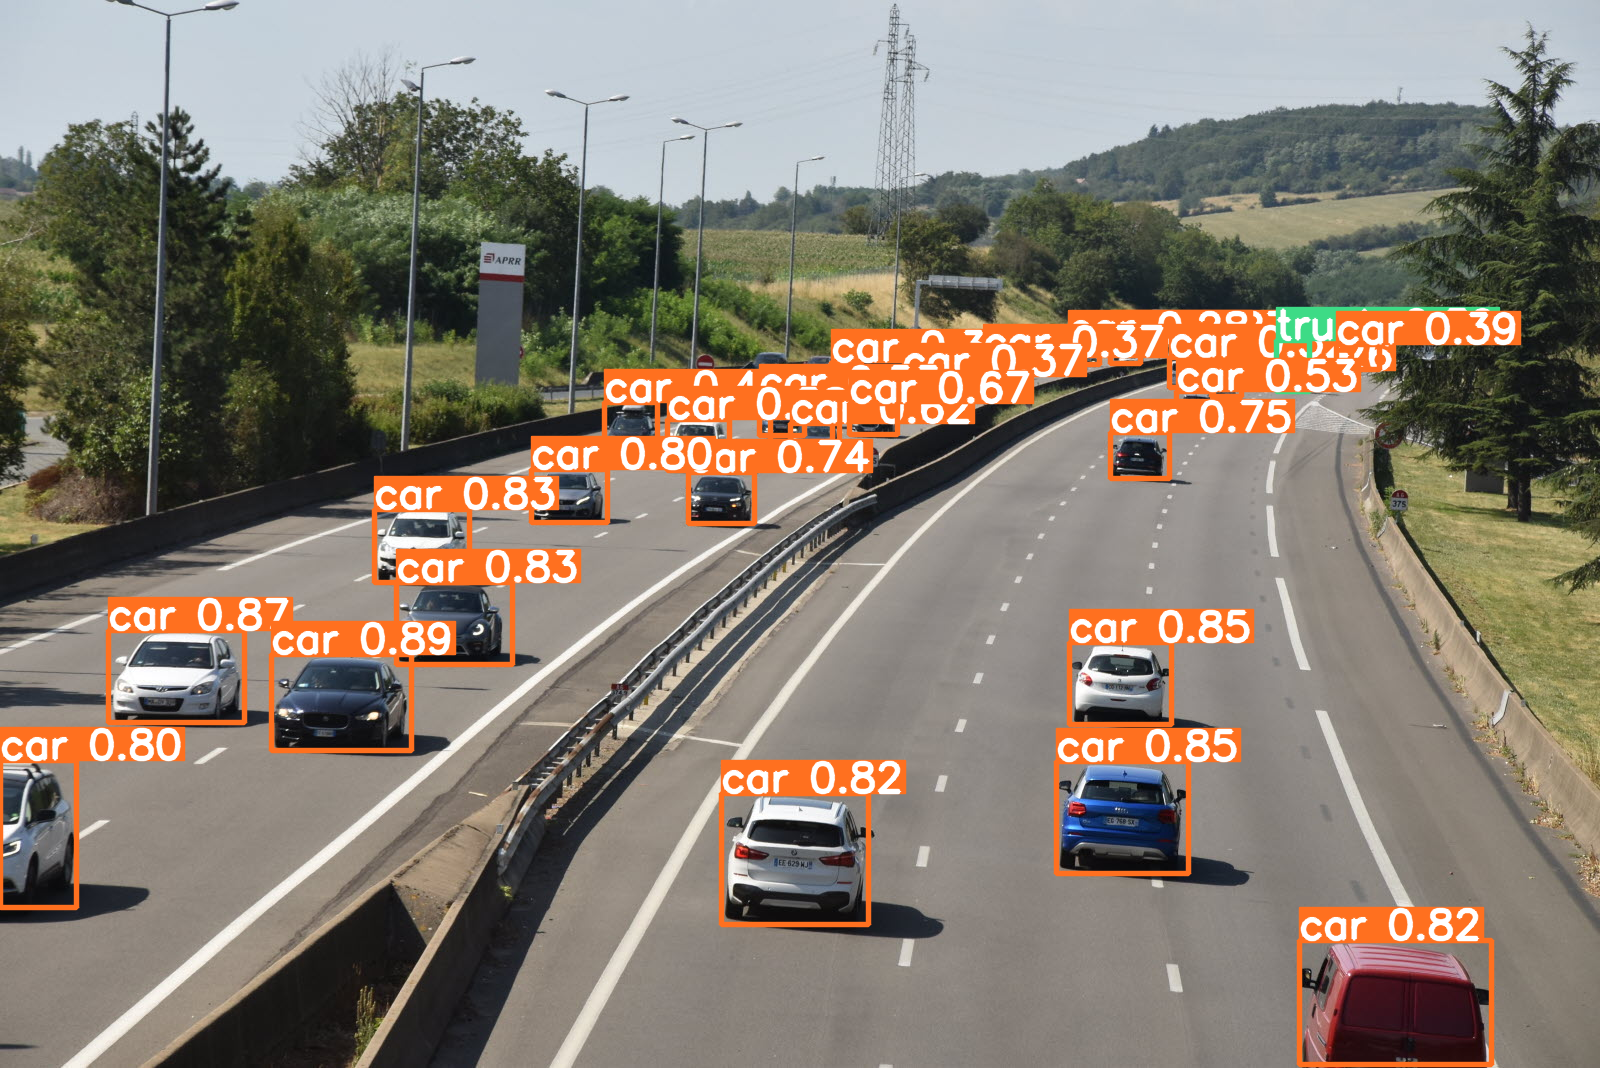

In [12]:
voiture = "data/pictures/voitureautoroute.jpg"
results = model(voiture)
results.print()
results.show()

# REAL TIME DETECTION

In [25]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    
    cv2.imshow('TiredFaceAI', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# TRAINING
python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt

In [26]:
import uuid
import time

In [29]:
IMAGES_PATH = "data/images"
labels = ['not_tired', 'tired']
number_imgs = 20

In [30]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print(f'Collecting images for {label} - Image number {img_num}')
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label + '_' + f'{str(uuid.uuid1())}.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('TiredFaceAI', frame)
        time.sleep(3)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

# LOADING MODEL

In [32]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/matthieu/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-29 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [38]:
image_tired = 'data/pictures/pictures1.jpg'
image_awake = 'data/pictures/pictures0.jpg'

image 1/1: 720x1280 1 tired
Speed: 6.5ms pre-process, 47.9ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


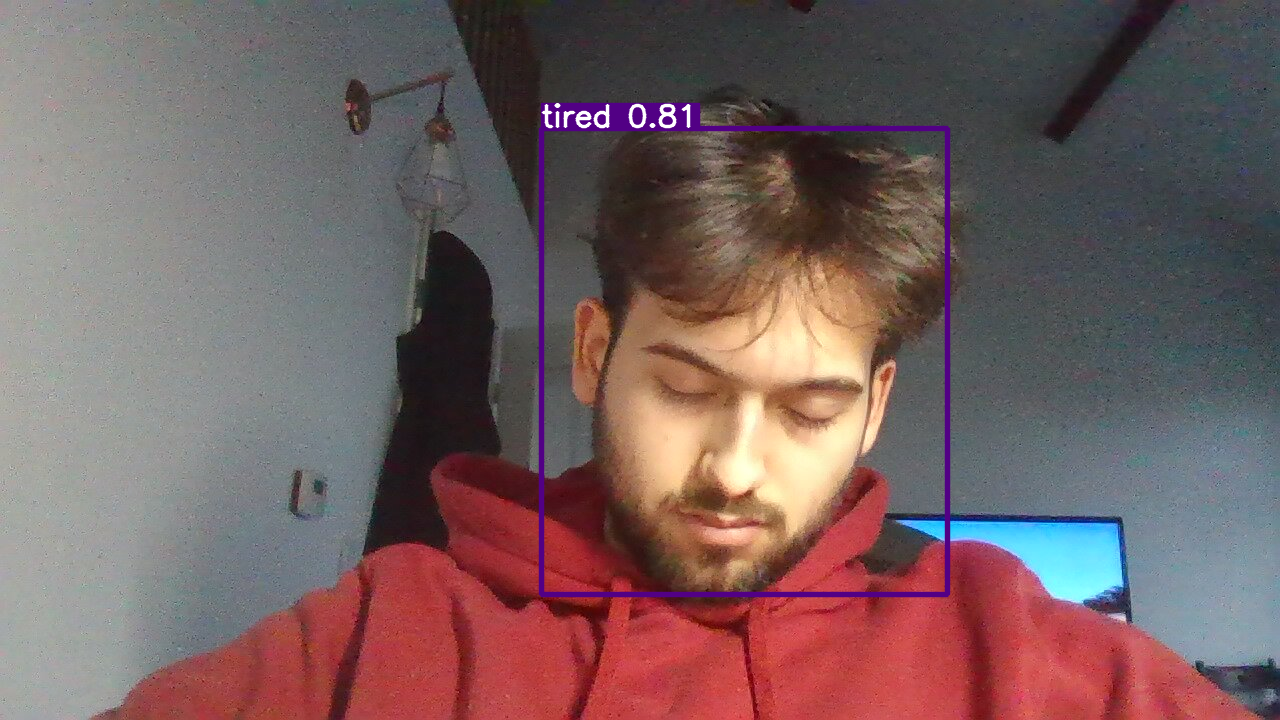

In [40]:
results = model(image_tired)
results.print()
results.show()